Based on

"Bubonic plague: a metapopulation modelof a zoonosis" 

by M. J. Keeling and C. A. Gilligan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [11]:
# The Model #

def dX_dt(X,t):
    
    S = X[0]
    I = X[1]
    R = X[2]
    N = X[3]
    F = X[4]
    
    T = S+I+R
    
    dS = r_R*S*(1-T/K_R)+r_R*R*(1-p)-d_R*S-beta*S*F*(1-np.exp(-a*T))/T
    dI = beta*S*F*(1-np.exp(-a*T))/T - d_R*I - m*I
    dR = r_R*R*(p-T/K_R)+m*g*I-d_R*R
    dN = r_F*N*(1-N/K_F) + d_F*F*(1-np.exp(-a*T))/T
    dF = (d_R + m*(1-g))*I*N - d_F*F
    
    return [dS, dI, dR, dN, dF]

In [7]:
# Parameters #

r_R = 5 
p = 0.975
K_R = 2500
d_R = 0.2
beta = 4.7
m = 20
g = 0.02
a = 0.004
r_F = 20
d_F = 10
K_F = 6.57

In [9]:
# Initial Conditions #

S_0 = 2500
I_0 = 0
R_0 = 0
N_0 = 6.57
F_0 = 1

X_0=[S_0, I_0, R_0, N_0, F_0]

In [18]:
# Solving the ODE #

# numerical time steps (time start, time end, number steps)
dt=np.linspace(0,40,10000)

# numerically integrate the ode
ans=odeint(dX_dt,X_0,dt)

# pull solutions
S = ans[:,0]
I = ans[:,1]
R = ans[:,2]
N = ans[:,3]
F = ans[:,4]

# define potential infection force to humans
lambda_H = F*np.exp(-a*(S+I+R))

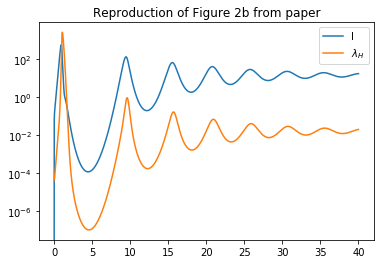

In [26]:
# Plots # 

plt.plot(dt,I,label='I')
plt.plot(dt,lambda_H,label='$\lambda_H$')
plt.title('Reproduction of Figure 2b from paper')
plt.yscale('log')
plt.legend()
plt.show()